<a href="https://colab.research.google.com/github/Husain-Vora/Deep-Learning-and-AI/blob/main/Linear_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
data

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target.shape

(569,)

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    data.data, data.target, test_size = 0.33
)

In [ ]:
N, D = X_train.shape

In [ ]:
N, D

(381, 30)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Alternative
# model = tf.keras.models.Sequntial()
# model.add(tf.keras.layers.Dense(1, input_size=(D,), activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
r = model.fit(X_train, Y_train,
              validation_data = (X_test, Y_test),
              epochs = 150)

Epoch 1/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.8514 - loss: 0.4080 - val_accuracy: 0.8617 - val_loss: 0.3966
Epoch 2/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.8769 - loss: 0.3630 - val_accuracy: 0.8830 - val_loss: 0.3682
Epoch 3/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - accuracy: 0.9137 - loss: 0.3182 - val_accuracy: 0.8989 - val_loss: 0.3441
Epoch 4/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.9245 - loss: 0.2864 - val_accuracy: 0.9043 - val_loss: 0.3238
Epoch 5/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9135 - loss: 0.3048 - val_accuracy: 0.8989 - val_loss: 0.3062
Epoch 6/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9621 - loss: 0.2541 - val_accuracy: 0.9149 - val_loss: 0.2911
Epoch 7/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.9501 - loss: 0.2316 - val_accuracy: 0.9149 - val_loss: 0.2783
Epoch 8/150
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9336 - loss: 0.2617 - val_accuracy: 0.

In [ ]:
print("Train Score : ", model.evaluate(X_train, Y_train))
print("Test Score : ", model.evaluate(X_test, Y_test))
# [loss, accuracy]

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9837 - loss: 0.0557 
Train Score :  [0.06569088995456696, 0.9868766665458679]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9684 - loss: 0.0766 
Test Score :  [0.08640477806329727, 0.9627659320831299]


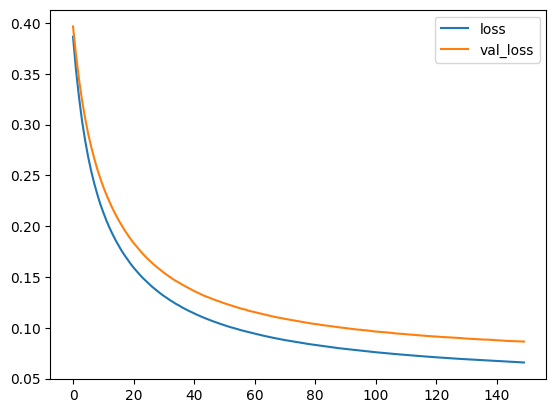

In [ ]:
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss');
plt.plot(r.history['val_loss'], label='val_loss');
plt.legend();

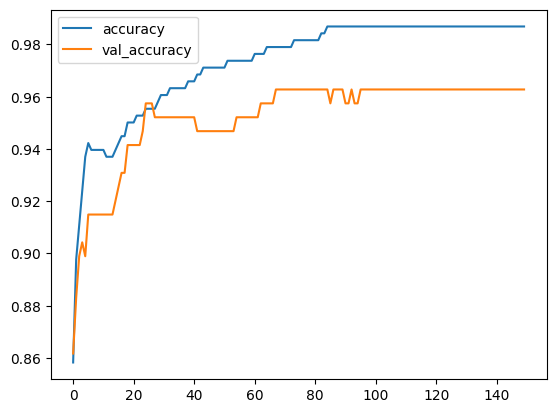

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy');
plt.plot(r.history['val_accuracy'], label='val_accuracy');
plt.legend();

# **Part 2 : Making Predictions**

In [ ]:
P = model.predict(X_test)
print(P) # they are outputs of the sigmoid, interpreted as probabilities p(y = 1 | x)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[1.3220991e-02]
 [9.9769038e-01]
 [5.8200932e-01]
 [9.9626702e-01]
 [9.9975795e-01]
 [9.9925989e-01]
 [1.5129257e-02]
 [1.6704516e-03]
 [9.9890208e-01]
 [3.6698082e-06]
 [9.9977022e-01]
 [9.9820745e-01]
 [9.8444831e-01]
 [4.7186199e-06]
 [2.0757619e-10]
 [9.9410123e-01]
 [9.9590820e-01]
 [7.5060285e-05]
 [9.9546313e-01]
 [9.8453909e-01]
 [9.8985606e-01]
 [9.5670849e-01]
 [9.9979526e-01]
 [9.9666625e-01]
 [3.6163919e-11]
 [9.8097616e-01]
 [7.8337550e-01]
 [7.9874380e-06]
 [9.9948341e-01]
 [7.0921018e-20]
 [2.4808902e-05]
 [9.9846196e-01]
 [9.9944282e-01]
 [9.2647618e-01]
 [6.1814430e-06]
 [7.9561150e-01]
 [9.9885261e-01]
 [6.6438518e-02]
 [5.8273524e-01]
 [9.9308544e-01]
 [9.9988079e-01]
 [9.9991053e-01]
 [9.9993372e-01]
 [9.9310452e-01]
 [4.7795057e-01]
 [8.9779747e-01]
 [9.9921507e-01]
 [9.9166089e-01]
 [9.9901026e-01]
 [1.3922365e-08]
 [2.8542113e-08]
 [9.9999946e-01]
 [9.9999273e-01]
 [2.5306359e-01]
 [2.8657911e-03]
 [8.1907213e-01]
 [6.288620

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1.
 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1.
 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [ ]:
# Calculate the accuracy, compare it to evaluate() output
print(f"Manually calculated accuracy : {np.mean(P == Y_test)}")
print(f"Evaluate Ouput : {model.evaluate(X_test, Y_test)}")

Manually calculated accuracy : 0.9627659574468085
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9684 - loss: 0.0766 
Evaluate Ouput : [0.08640477806329727, 0.9627659320831299]


# **Part 3 : Saving and Loading Model**

In [ ]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [ ]:
# Check that the model file exists
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K May 29 14:55 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K May 23 13:39 sample_data


In [ ]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, Y_test)

[<Dense name=dense, built=True>]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9684 - loss: 0.0766  


[0.08640477806329727, 0.9627659320831299]

In [ ]:
# Download the file - requires Chrome (at this point)
#from google.colab import files
#files.download('linearclassifier.h5')